# Two-Body-Problem Circle Orbit Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

In [2]:
class Star:
    def __init__(self, name, init_pos, init_vel, mass):
        self.name = name
        self.p = init_pos
        self.v = init_vel
        self.m = mass

In [3]:
def rk4(pos_0, vel_0, M_1, M_2, t_l, dt, G):
    mu = G*(M_1 + M_2)
    # mu = G*M_1
    pos_list = [pos_0]
    vel_list = [vel_0]

    t_tmp = 0
    while t_tmp <= t_l:
        # r_3 = la.norm(pos_list[-1])**3

        # k1 : 
        v1 = vel_list[-1] * dt
        a1 = (-mu * pos_list[-1] / la.norm(pos_list[-1])**3) * dt
        
        # k2 : 
        v2 = (vel_list[-1] + 0.5*v1) * dt
        a2 = (-mu * (pos_list[-1] + 0.5*v1) / la.norm(pos_list[-1] + 0.5*v1)**3) * dt

        # k3 : 
        v3 = (vel_list[-1] + 0.5*v2) * dt
        a3 = (-mu * (pos_list[-1] + 0.5*v2) / la.norm(pos_list[-1] + 0.5*v2)**3) * dt

        # k4 : 
        v4 = (vel_list[-1] + v3) * dt
        a4 = (-mu * (pos_list[-1] + v3) / la.norm(pos_list[-1] + v3)**3) * dt

        
        tmp_next_pos = pos_list[-1] + (v1 + 2*v2 + 2*v3 + v4) / 6
        tmp_next_vel = vel_list[-1] + (a1 + 2*a2 + 2*a3 + a4) / 6

        pos_list.append(tmp_next_pos)
        vel_list.append(tmp_next_vel)

        t_tmp += dt

    return pos_list, vel_list

In [4]:
# G = 6.67
# M1_mass = 100
# M2_mass = 2
# R = 10

G = 38.925  # AU^3 / (M_sun * yr^2)
M1_mass = 1.0  # Sun
M2_mass = 9.546e-4  # Jupiter
R = 30.1

In [5]:
M2_v_0 = np.sqrt(G*M1_mass / R)

In [6]:
M_1 = Star("M1", np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), M1_mass)
M_2 = Star("M2", np.array([R, 0.0, 0.0]), np.array([0.0, M2_v_0, 0.0]), M2_mass)

In [7]:
r_vec = M_2.p - M_1.p
v_vec = M_2.v - M_1.v

In [8]:
# t_length = (5/2)*np.pi
# dt = t_length / 1000

t_length = 30 # year
n_point = 300
dt = t_length / n_point

In [9]:

test_pos, test_vel = rk4(r_vec, v_vec, M_1.m, M_2.m, n_point, dt, G)

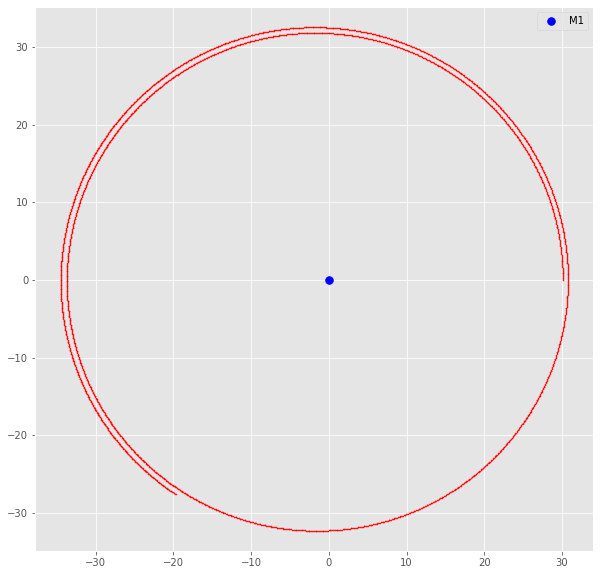

In [10]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
for i in test_pos:
    ax.plot(i[0], i[1], "ro", markersize=0.5)

plt.plot(0.0, 0.0, "b.", label="M1", markersize=15)
plt.axis("equal")
plt.legend()
plt.show()